In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
r = 5e-3 #inner diameter in meters
l = np.pi*r # length of wire in meters
r1 = 52.8363e-3 # Resistance per unit lenght of 22 AWG wire
R = r1*l # Resistance of the coil
L = 6.69e-9 # Inductance of the coil
C = 5e-3 # capacitance of the circuit in F
Vc = 400 # DC supply in Volts

#Printing all values
print(f"Inner Diameter of the coil: {r} m",'\n')
print(f"Length of Coil: {l} m",'\n')
print(f"Resistance per unit lenght of 22 AWG wire: {r1} ohm/m",'\n')
print(f"Net Resistance of circuit: {R} ohm",'\n')
print(f"Net Inductance of circuit: {L} H",'\n')
print(f"Net Capacitance of circuit: {C} F",'\n')
print(f"DC Voltage source: {Vc} Volts",'\n')

Inner Diameter of the coil: 0.005 m 

Length of Coil: 0.015707963267948967 m 

Resistance per unit lenght of 22 AWG wire: 0.0528363 ohm/m 

Net Resistance of circuit: 0.000829950659614332 ohm 

Net Inductance of circuit: 6.69e-09 H 

Net Capacitance of circuit: 0.005 F 

DC Voltage source: 400 Volts 



In [3]:
s, t = sp.symbols('s t') # Define symbols
t_s = np.linspace(0, 5e-3, 5001)  # Generate time values for plotting
F_s = Vc/((L*s**2)+ (R*s) + (1/C)) # Laplace function for the Circuit for an iron core magnetic stimulator.
f_t = sp.inverse_laplace_transform(F_s, s, t) # Calculate the inverse Laplace transform
f = sp.lambdify(t, f_t, 'numpy') # Convert symbolic function to numeric function
f_t1 = f(t_s) # Evaluate the function at time values
didt = np.gradient(f_t1, t_s) # Differentitaing currect with respect to time

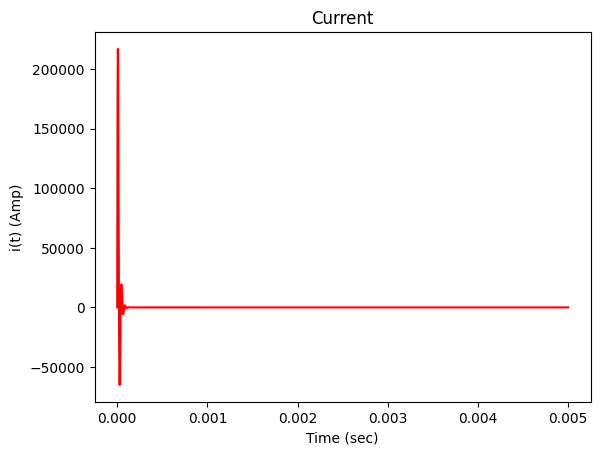

In [4]:
# Plot the current
plt.plot(t_s, f_t1,color = "red")
plt.xlabel('Time (sec)')
plt.ylabel('i(t) (Amp)')
plt.title('Current')
plt.show()

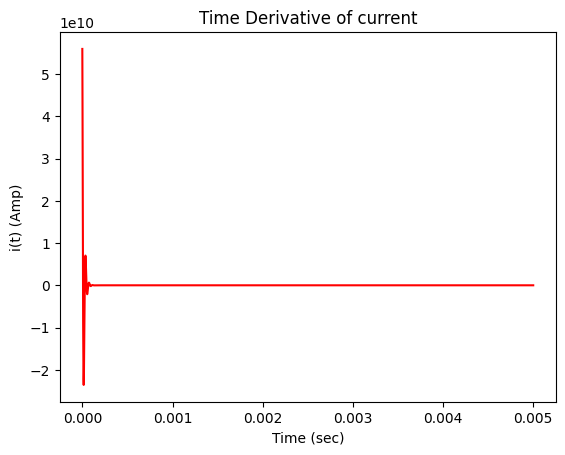

In [5]:
# Plot the function and its derivative
plt.plot(t_s, didt,color = "red")
plt.xlabel('Time (sec)')
plt.ylabel('i(t) (Amp)')
plt.title('Time Derivative of current')
plt.show()

In [6]:
# This code will generate the x component of Electric
def Ex_calulate(x,y):
    position = np.array([x,y,0]) # point in XY plane where Field is calculated
    center = np.array([0,4e-3,0.5e-3]) # center of the coil in meters
    Radius = 2.5e-3 # Radius of coil in meters
    I = np.max(didt) # maximum change in current
    THETA = np.linspace(0,2*np.pi,500) # array of angles
    Ex_total = 0
    for theta in THETA:
        r_dash = center + np.array([Radius*np.cos(theta),Radius*np.sin(theta),0])  #  position of a small segment of the coil
        temp2 = position - r_dash # vector joining point in XY plane and segment of the coil
        magnit = np.sqrt(np.sum(temp2**2)) # magnitude of the vector joining point in XY plane and segment of the coil
        dlx = -Radius*np.sin(theta) # x component of vector oriented along the direction of the coil segment. 
        Ex = dlx/magnit # electric field due to each segment of coil at point in space
        Ex_total = Ex_total + Ex
    Ex_total = (-I*(10**-7))*Ex_total # multiply by current and permiability
    return Ex_total

In [7]:
# This code will generate the Electric Feild Vector
def dEdx_calulate(x,y):
    position = np.array([x,y,0]) # point in XY plane where Field is calculated
    center = np.array([0,4e-3,0.5e-3]) # center of the coil in meters
    Radius = 2.5e-3 # Radius of coil in meters
    I = np.max(didt) # maximum change in current
    THETA = np.linspace(0,2*np.pi,500) # array of angles
    Ex_total = 0
    for theta in THETA:
        r_dash = center + np.array([Radius*np.cos(theta),Radius*np.sin(theta),0])  #  position of a small segment of the coil
        temp2 = position - r_dash # vector joining point in XY plane and segment of the coil
        magnit = np.sqrt(np.sum(temp2**2)) # magnitude of the vector joining point in XY plane and segment of the coil
        dlx = -Radius*np.sin(theta)*(center[0]+Radius*np.cos(theta)-x) # derivative of x component of vector oriented along the direction of the coil segment. 
        Ex = dlx/(magnit**3)
        Ex_total = Ex_total + Ex
    Ex_total = (-I*(10**-7))*Ex_total # multiply by current and permiability
    return Ex_total

In [8]:
# Generate integer points in XY plane
X = np.linspace(-40e-3, 40e-3, 200) # Samples in X axis
Y = np.linspace(-40e-3, 40e-3, 200) # Samples in Y axis
X, Y = np.meshgrid(X, Y)

# Calculate Ex for each point
Ex = np.zeros_like(X)
dEdx = np.zeros_like(X)
for i in range(len(X)):
    for j in range(len(Y)):
        Ex[i,j] = Ex_calulate(X[i,j], Y[i,j])
        dEdx[i,j] = dEdx_calulate(X[i,j], Y[i,j])


<Figure size 640x480 with 0 Axes>

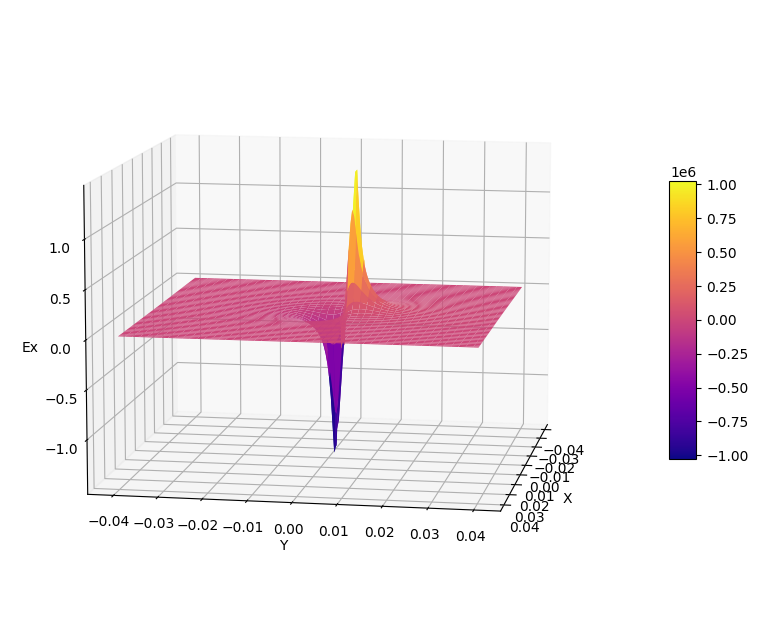

In [9]:
# Plot the 3D surface
fig = plt.figure()
fig = plt.figure(figsize=(10,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Ex, cmap='plasma')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Ex')
ax.view_init(elev=10, azim=10)
fig.colorbar(surf, ax=ax, shrink=0.3, aspect = 10)
plt.show()


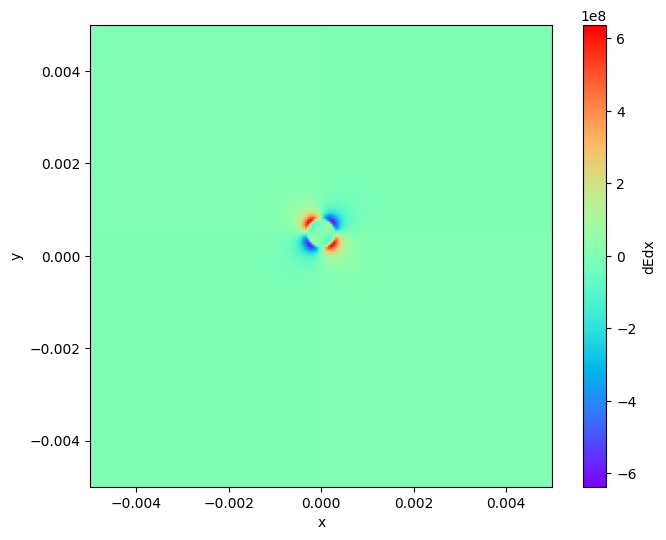

In [11]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(dEdx, extent=[-5e-3, 5e-3, -5e-3, 5e-3], origin='lower', cmap='rainbow')
plt.colorbar(label='dEdx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()